In [31]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
plt.style.use("seaborn-talk")

%matplotlib notebook
warnings.filterwarnings("ignore")

In [2]:
# sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
# y=mx+c create linear hypothesis

def hypothesis(x,w):
    return np.dot(x,w)

In [4]:
# entropy for error

def error_function(y,y_cap):
    error=((-y*np.log(y_cap)-(1-y)*np.log(1-y_cap))**2).mean()
    return error

In [5]:
# gradient descent for optimization

def gradient_descent(x,y,y_cap,alpha=0.2):
    return alpha*(x.T@(y_cap-y).T)/len(y)

In [25]:
# calculate the weight

def calculate_weight(x,y,weight=np.array([1,1,1])):
    for z in np.arange(1,0.00001,-0.0001):
        Y=hypothesis(x,weight)
        y_cap=sigmoid(Y)
        error=error_function(y,y_cap)
        weight=weight-gradient_descent(x,y,y_cap,z)
    return weight,error

In [26]:
# calculate weight for NOT,AND,OR

INPUT=np.array([[1,0,0],[1,1,0],[1,0,1],[1,1,1]])

OR=np.array([0,1,1,1])
OR_weight,error=calculate_weight(INPUT,OR,np.array([0,0,0]))
print("OR Weight",OR_weight)
print("OR Error",error,end="\n\n")

OR Weight [-5.50794637 11.93488862 11.93488862]
OR Error 5.398851621743304e-06



In [27]:
def Predict(x,w):
    return sigmoid(hypothesis(x,w))

In [28]:
def or_gate(x,y):
    return Predict(np.array([1,x,y]),OR_weight)

<IPython.core.display.Javascript object>


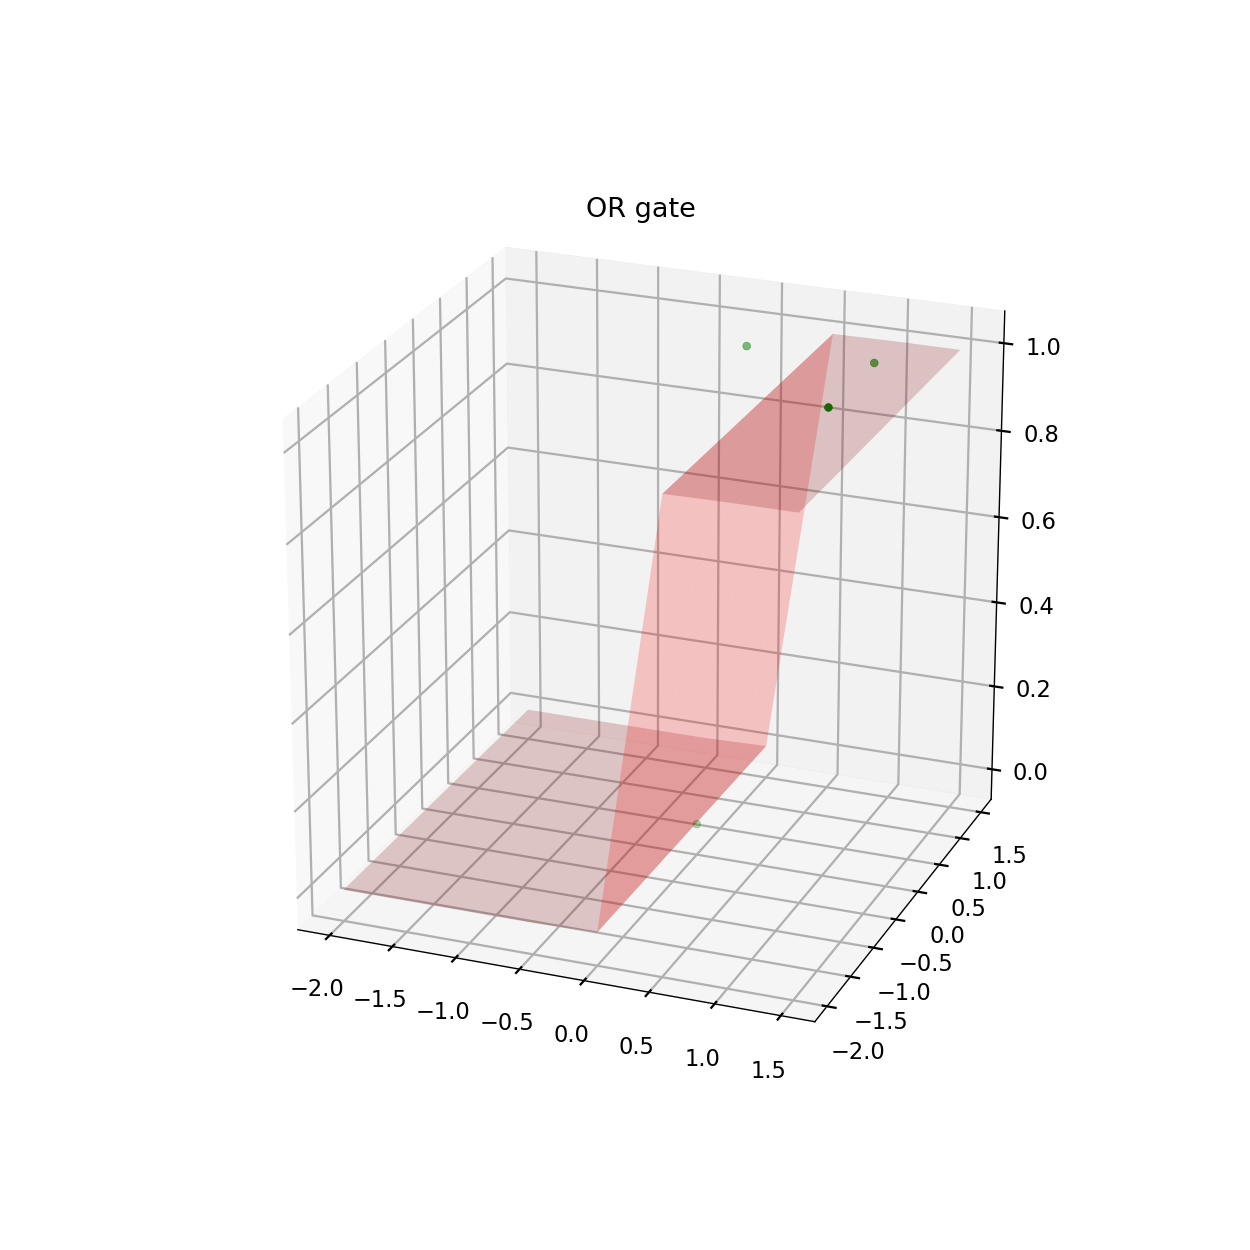

In [32]:
fig=plt.figure(figsize=(10,10))
Input=[[0,0],[0,1],[1,0],[1,1]]

ax=plt.subplot(111,projection="3d")
ax.scatter(INPUT[:,1:2],INPUT[:,2:3],OR,s=20,c='g',label="Data Points")
ax.set(facecolor="white",title="OR gate")

X=np.arange(-2,2,0.5)
X,Y=np.meshgrid(X,X)
Z=np.array([[or_gate(z,z) for z in i] for i in X])
ax.plot_surface(X,Y,Z,alpha=0.2,color="r")